In [35]:
#Importing all needed libraries
%matplotlib inline
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import codecs

import datetime as dt
from datetime import datetime

plt.style.use('ggplot')

In [36]:
#Find current working directory

#Cath's
os.chdir('C://Users/Catharina/Desktop/FLAT_RCL')

#Patrick's
#os.chdir('C://Users//PATWEB/Desktop')

In [37]:
names = ["Record_ID", "CAMPNO", "MAKETXT", "MODELTXT",
    "YEARTXT", "MFGCAMPNO", "COMPNAME", "MFGNAME",
    "BGMAN", "ENDMAN", "RCLTYPECD", "POTAFF", "ODATE",
    "INFLUENCED_BY", "MFGTXT", "RCDATE", "DATEA",
    "RPNO", "FMVSS", "DESC_DEFECT", "CONEQUENCE_DEFECT",
    "CORRECTIVE_ACTION", "NOTES", "RCL_CMPT_ID"
]

In [38]:
type(names)

list

In [39]:
with codecs.open('FLAT_RCL.txt', "r",encoding='utf-8', errors='ignore') as fdata:
    df = pd.read_table(fdata, names=names, header=None)

c:\program files (x86)\python36-32\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [40]:
#display dimensions of dataframe 'df'
df.shape
df.head()

,Record_ID,CAMPNO,MAKETXT,MODELTXT,YEARTXT,MFGCAMPNO,COMPNAME,MFGNAME,BGMAN,ENDMAN,...,MFGTXT,RCDATE,DATEA,RPNO,FMVSS,DESC_DEFECT,CONEQUENCE_DEFECT,CORRECTIVE_ACTION,NOTES,RCL_CMPT_ID
0,1,02V288000,FORD,FOCUS,2001,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,Ford Motor Company,20021106.0,20021106,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215022000000202
1,2,02V288000,FORD,FOCUS,2000,02S41,ELECTRICAL SYSTEM:BATTERY:CABLES,FORD MOTOR COMPANY,19990719.0,20010531.0,...,Ford Motor Company,20021106.0,20021106,NaN,NaN,CERTAIN PASSENGER VEHICLES EQUIPPED WITH ZETEC...,"THIS, IN TURN, COULD CAUSE THE BATTERY CABLES ...",DEALERS WILL INSPECT THE BATTERY CABLES FOR TH...,ALSO CONTACT THE NATIONAL HIGHWAY TRAFFIC SAFE...,000015339000215021000000202
2,3,02V236000,JAYCO,FT EAGLE 10 SG,2003,NaN,EQUIPMENT:OTHER:LABELS,"JAYCO, INC.",20020730.0,20020813.0,...,"Jayco, Inc.",20020904.0,20020912,NaN,NaN,"ON CERTAIN FOLDING TENT CAMPERS, THE FEDERAL C...","IF THE TIRES WERE INFLATED TO 80 PSI, THEY COU...",OWNERS WILL BE MAILED CORRECT LABELS FOR INSTA...,"ALSO, CUSTOMERS CAN CONTACT THE NATIONAL HIGHW...",000015210000106403000000349
3,4,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2003,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106325000000272
4,5,02V237000,HOLIDAY RAMBLER,ADMIRAL SE,2002,NaN,STRUCTURE,MONACO COACH CORP.,NaN,NaN,...,MONACO COACH CORPORATION,20020909.0,20020912,NaN,NaN,"ON CERTAIN CLASS A MOTOR HOMES, THE FLOOR TRUS...",CONDITIONS CAN RESULT IN THE BOTTOMING OUT THE...,DEALERS WILL INSPECT THE FLOOR TRUSS NETWORK S...,CUSTOMERS CAN ALSO CONTACT THE NATIONAL HIGHWA...,000015211000106324000000272


In [41]:
#[TODO] Update sort_values to sort

#converts content of column 'RCDATE' to desired timestamp format
df['Timestamp']=pd.to_datetime(df['RCDATE'],format='%Y%m%d',errors='ignore')


#create a column 'Year' 
df['Year'] = df['Timestamp'].apply(lambda x: "%s" %(x.year))

#sort dataframe by the recall year in order to have 'month/year' groups in chronological order
df=df.sort(columns='Year')

#create 'Month/Year' column to prepare for grouping
df['Week/Year'] = df['Timestamp'].apply(lambda x: "%s/%s" %(x.week, x.year))

c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:11: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [42]:
#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES'),['MAKETXT']]='MERCEDES BENZ'

#if column 'MAKETXT' lists 'MERCEDES' as content, rename to 'MERCEDES BENZ'
df.ix[(df.MAKETXT=='MERCEDES-BENZ'),['MAKETXT']]='MERCEDES BENZ'

#Use when you want Audi, BMW, and Mercedes
#We should refactor code to split the dataframe in one area. Aka the "df" should be something like ger_df
#df=df[(df['MAKETXT'].str.contains("AUDI|BMW|MERCEDES")==True)
#    & (df['MAKETXT'].str.contains("AUDIOVOX")==False)
#    & (df['MAKETXT'].str.contains("JL")==False)]

#Use when you want only Mercedes
mb_df=df[(df['MAKETXT'].str.contains("MERCEDES BENZ")==True)
    & (df['MAKETXT'].str.contains("AUDIOVOX")==False)
    & (df['MAKETXT'].str.contains("JL")==False)]

#Use when you only want SUVs
#This is a dirty hodgepodge of random search strings, but had to be done for now...
suv_df=mb_df[(df['MODELTXT'].str.contains("M CLASS|"
                                         "M-CLASS|"
                                         "ML|"
                                         "GL|"
                                         "M")==True)
    & (df['MODELTXT'].str.contains("GLK|"
                                   "GLC|"
                                   "GLA|"
                                   "MERCEDES|"
                                   "MATS|"
                                   "MAT|"
                                   "BROU|"
                                   "SMART|"
                                   "CLA45|"
                                   "SLR|"
                                   "S63|"
                                   "S65|"
                                   "GT S|"
                                   "METRIS")==False)]

c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [43]:
df = df.dropna(subset=['Timestamp', 'Year'])

In [44]:
#Unstacking from multiindex series back to dataframe
graphdata = df.groupby(by=['Timestamp','MAKETXT'])['POTAFF'].sum()
graphdata = graphdata.reset_index().pivot(index='Timestamp', columns='MAKETXT')
graphdata.index.to_datetime()

#Look at address below for resample docs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
graphdata = graphdata.resample('5A').sum()

graphdata.head()
graphdata.describe

<bound method NDFrame.describe of                             POTAFF                                           \
MAKETXT    109S MEDALIST TRAIL A/P 109S PHANTOM AP 112S UNIROYAL LAREDO A/S   
Timestamp                                                                     
1966-12-31                     NaN             NaN                      NaN   
1971-12-31                     NaN             NaN                      NaN   
1976-12-31                     NaN             NaN                      NaN   
1981-12-31                     NaN             NaN                      NaN   
1986-12-31                     NaN             NaN                      NaN   
1991-12-31                     NaN             NaN                      NaN   
1996-12-31                     NaN             NaN                      NaN   
2001-12-31                     NaN             NaN                      NaN   
2006-12-31                 46000.0         46000.0                  46000.0   
2011-12-31        

In [45]:
'''
fig=plt.figure()
ax=fig.add_subplot(111)
N=11

AudiData=graphdata['POTAFF,Audi']
BMWData=graphdata['POTAFF,BMW']

ind = np.arange(N)
width=0.35

Audi=ax.bar(ind,AudiData,width,
             color='black',
             error_kw=dict(elinewidth=2,ecolor='blue'))

BMW=ax.bar(ind+width,BMWData,width,
             color='blue',
             error_kw=dict(elinewidth=2,ecolor='black'))

ax.set_xlim(-width,len(ind)+width)
ax.set_ylim(0,40)
ax.set_ylabel('Number of Vehicles')
ax.set_title('Number of Vehicles by MB and Market')
xTickMarks=['Recall'+str(i) for i in range (1,5)]
ax.set_xticks(ind+width)
xtickNames=ax.set_xticklabels(xTickMarks)
plt.setp(xtickNames, rotation=45, fontsize=10)

ax.legend((Audi[0], BMW[0]), ('MB', 'Market'))

plt.show()

'''

"\nfig=plt.figure()\nax=fig.add_subplot(111)\nN=11\n\nAudiData=graphdata['POTAFF,Audi']\nBMWData=graphdata['POTAFF,BMW']\n\nind = np.arange(N)\nwidth=0.35\n\nAudi=ax.bar(ind,AudiData,width,\n             color='black',\n             error_kw=dict(elinewidth=2,ecolor='blue'))\n\nBMW=ax.bar(ind+width,BMWData,width,\n             color='blue',\n             error_kw=dict(elinewidth=2,ecolor='black'))\n\nax.set_xlim(-width,len(ind)+width)\nax.set_ylim(0,40)\nax.set_ylabel('Number of Vehicles')\nax.set_title('Number of Vehicles by MB and Market')\nxTickMarks=['Recall'+str(i) for i in range (1,5)]\nax.set_xticks(ind+width)\nxtickNames=ax.set_xticklabels(xTickMarks)\nplt.setp(xtickNames, rotation=45, fontsize=10)\n\nax.legend((Audi[0], BMW[0]), ('MB', 'Market'))\n\nplt.show()\n\n"

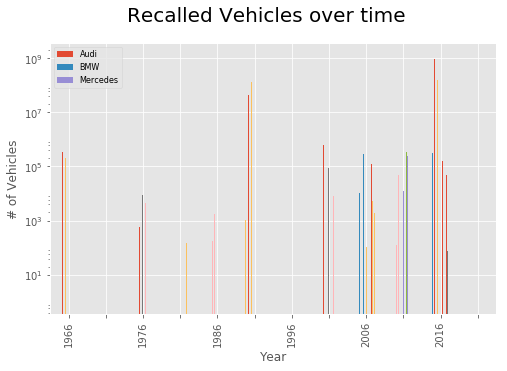

In [46]:
#Graphing section
ax = graphdata.plot(kind='bar', figsize= (8,5))
fig = ax.get_figure()

fig.suptitle('Recalled Vehicles over time', fontsize=20)

ax.legend(loc=2,prop={'size':6})
ax.legend(["Audi","BMW","Mercedes"], fontsize=8)

ax.set_xlabel("Year", fontsize=12)
# Initializes all ticklables as blank
xticklabels = ['']*len(graphdata.index)
# Every 2nd ticklable shows the year
xticklabels[::2] = [item.strftime('%Y') for item in graphdata.index[::2]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(xticklabels))

ax.set_ylabel("# of Vehicles", fontsize=12)
ax.set_yscale('log')

fig.savefig("output.pdf")

In [47]:
#Attempt to make a pie chart showing all suv recall basic types

#I'm looking at everything before the first colon in COMPNAME
#Sombody might want to look into this error but it didn't make sens
# to my 4:30 brain
suv_df['COMPNAME'] = suv_df.COMPNAME.apply(lambda x: x[:x.find(":")])

#Another problem is this will delete fields with no colon haha

c:\program files (x86)\python36-32\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [48]:
suv_df.to_excel('comp.xlsx')

ModuleNotFoundError: No module named 'openpyxl'

In [ ]:
#Unstacking from multiindex series back to dataframe
#issuefreq = suv_df.groupby(by=['Timestamp','COMPNAME'])['POTAFF'].sum()
#issuefreq = suv_df.groupby(by=['COMPNAME'])['POTAFF'].sum()
#issuefreq = issuefreq.reset_index().pivot(index='Timestamp', columns='COMPNAME')
#issuefreq.index.to_datetime()

#Look at address below for resample docs
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
#issuefreq = issuefreq.resample('W').sum()

issuefreq = suv_df.groupby(by=['COMPNAME'])['POTAFF'].sum()
issuefreq.sort_values(inplace=True, axis=0, ascending=False)

ax2 = issuefreq.plot(kind='bar', figsize= (8,5))
fig2 = ax2.get_figure()
ax2.set_yscale('log')
fig2.savefig("output2.pdf")
ax2.set_xlabel("Complaint Type", fontsize=12)
ax2.set_ylabel("# of Vehicles", fontsize=12)
fig2.suptitle('Vehicles per Recall Category, last 6 Months', fontsize=20)
#ax2.set_xticklabels(ax2.xaxis.get_majorticklabels(),rotation=45)

#start = issuefreq.index.searchsorted(dt.datetime(2016, 1, 2))
#end = issuefreq.index.searchsorted(dt.datetime(2017, 1, 4))
#start = pd.datetime(2015, 1, 1)
#end = pd.datetime(2016, 1, 1)
#drng = pd.bdate_range(start, end, freq='W')

#issuefreq.truncate(after='12/31/2016')
issuefreq.ix[start:end]